# Mini Project

In this mini project I will be analysing world development indicator data to answer the following research question:
**Is there a relationship between infant mortality and healthcare expenditure?**

The data used in this project was retrieved from Kaggle: https://www.kaggle.com/manchunhui/wdi-dataset-preliminary-eda. 

### Import libraries

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import data from a CSV file

In [54]:

wdi_data = pd.read_csv("Data/WDIData.csv")

### Melt dataframe and remove years without data

In [55]:
wdi_data = wdi_data.drop(columns="Unnamed: 65").melt(id_vars=["Country Code", "Country Name", "Indicator Code", "Indicator Name"], var_name="Year", value_name="Value").reset_index(drop=True)
wdi_data["Year"] = wdi_data["Year"].astype(int)
# wdi_data = wdi_data.dropna()

### Conduct an initial exploration of the data

Data shape

In [56]:
wdi_data.shape

(23141448, 6)

The dataset has 66 columns and 379368 rows. What information is contained in these columns?

In [57]:
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23141448 entries, 0 to 23141447
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country Code    object 
 1   Country Name    object 
 2   Indicator Code  object 
 3   Indicator Name  object 
 4   Year            int32  
 5   Value           float64
dtypes: float64(1), int32(1), object(4)
memory usage: 971.1+ MB


How many missing values are present?

In [58]:
wdi_data.isna().sum()

Country Code             0
Country Name             0
Indicator Code           0
Indicator Name           0
Year                     0
Value             15562642
dtype: int64

How many unique countries were present?

In [50]:
len(wdi_data["Country Name"].unique())

263

Create a list of all countries

In [59]:
countries = wdi_data["Country Name"].unique().tolist()
countries

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle inc

How many unique indicators were used?

In [60]:
len(wdi_data["Indicator Name"].unique())

1437

Create a list of all indicators

In [61]:
indicators = wdi_data["Indicator Name"].unique().tolist()
indicators

['Access to clean fuels and technologies for cooking (% of population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)',
 'Acc

### Filter the data

Create masks to filter by indicators of interest. The indicators of interest are the under five mortality rate and current health expenditure per capita.

In [71]:
child_mortality_mask = wdi_data["Indicator Name"] == "Mortality rate, under-5 (per 1,000 live births)"

health_expenditure_mask = wdi_data["Indicator Name"] == "Current health expenditure per capita (current US$)"

Create a mask to remove country groups, e.g. the low income countries grouping. I would only like to include individual countries in the analysis. The first 47 entries in the countries list are country groupings that need to be removed.

In [70]:
country_mask = ~ wdi_data["Country Name"].isin(countries[:47])

Create a mask to filter the data by year of interest

In [76]:
year_mask = wdi_data["Year"] == 2017

Filter the dataset using the created masks

In [91]:
child_mortality_data = wdi_data[(child_mortality_mask) & (country_mask) & (year_mask)].dropna().rename(columns={"Value":"Mortality Rate Value"})
child_mortality_data.head(5)

,Country Code,Country Name,Indicator Code,Indicator Name,Year,Mortality Rate Value
21692312,AFG,Afghanistan,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,64.9
21693749,ALB,Albania,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,9.4
21695186,DZA,Algeria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,24.3
21698060,AND,Andorra,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,3.2
21699497,AGO,Angola,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,80.6


In [92]:
health_expenditure_data = wdi_data[(health_expenditure_mask) & (country_mask) & (year_mask)].dropna().rename(columns={"Value":"Health Expenditure Value"})
health_expenditure_data.head(5)

,Country Code,Country Name,Indicator Code,Indicator Name,Year,Health Expenditure Value
21691805,AFG,Afghanistan,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2017,67.122650
21694679,DZA,Algeria,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2017,258.494293
21697553,AND,Andorra,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2017,4040.786621
21698990,AGO,Angola,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2017,114.459641
21700427,ATG,Antigua and Barbuda,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2017,673.859680


### Problem: Data for some countries is missing for the chosen indicators. To enable comparison of indicator values across the countries, I need to get the data on the countries that had data for both indicators.

To get the intersection of the data, I can do an inner merge of the data tables for both indicators after removing entries with missing values.

In [93]:
health_expenditure_child_mortality_data = pd.merge(child_mortality_data, health_expenditure_data, how="inner", on=["Country Code", "Country Name", "Year"])
health_expenditure_child_mortality_data.head(5)

,Country Code,Country Name,Indicator Code_x,Indicator Name_x,Year,Mortality Rate Value,Indicator Code_y,Indicator Name_y,Health Expenditure Value
0,AFG,Afghanistan,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,64.9,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,67.122650
1,DZA,Algeria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,24.3,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,258.494293
2,AND,Andorra,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,3.2,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,4040.786621
3,AGO,Angola,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,80.6,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,114.459641
4,ATG,Antigua and Barbuda,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,7.1,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,673.859680


### Create scatterplot of current health expenditure per capita vs under five death

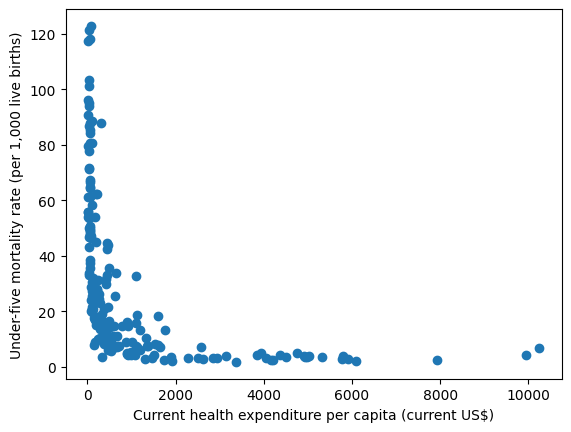

In [102]:
x = health_expenditure_child_mortality_data["Health Expenditure Value"]
y = health_expenditure_child_mortality_data["Mortality Rate Value"]

plt.scatter(x=x, y=y)
plt.xlabel("Current health expenditure per capita (USD)")
plt.ylabel("Under-five mortality rate (per 1,000 live births)")
plt.show()

Calculate the correlation coefficient between the data

In [100]:
np.corrcoef(x,y)

array([[ 1.        , -0.45137481],
       [-0.45137481,  1.        ]])